In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# 1. Load Data

In [2]:
df = pd.read_csv('pseudo_sigmoid_batches_long.csv')

In [3]:
df

,batch,data_point,value
0,Batch_1,0,0.031108
1,Batch_1,1,0.073149
2,Batch_1,2,0.000000
3,Batch_1,3,0.000000
4,Batch_1,4,0.075847
...,...,...,...
19995,Batch_20,995,0.972519
19996,Batch_20,996,0.997452
19997,Batch_20,997,0.986163
19998,Batch_20,998,0.987074


In [4]:
df_final = df.rename(columns = {'value':'Signal', 'data_point':'Volume', 'batch':'Batch'})
df_final["Campaign"] = "C1"
#df_final = df_final[df_final["Batch"] == "Batch_1"]
df_final


,Batch,Volume,Signal,Campaign
0,Batch_1,0,0.031108,C1
1,Batch_1,1,0.073149,C1
2,Batch_1,2,0.000000,C1
3,Batch_1,3,0.000000,C1
4,Batch_1,4,0.075847,C1
...,...,...,...,...
19995,Batch_20,995,0.972519,C1
19996,Batch_20,996,0.997452,C1
19997,Batch_20,997,0.986163,C1
19998,Batch_20,998,0.987074,C1


# 2. Preprocess data

## 2.1 Smoothing

In [5]:
from helper_functions import smooth_signal

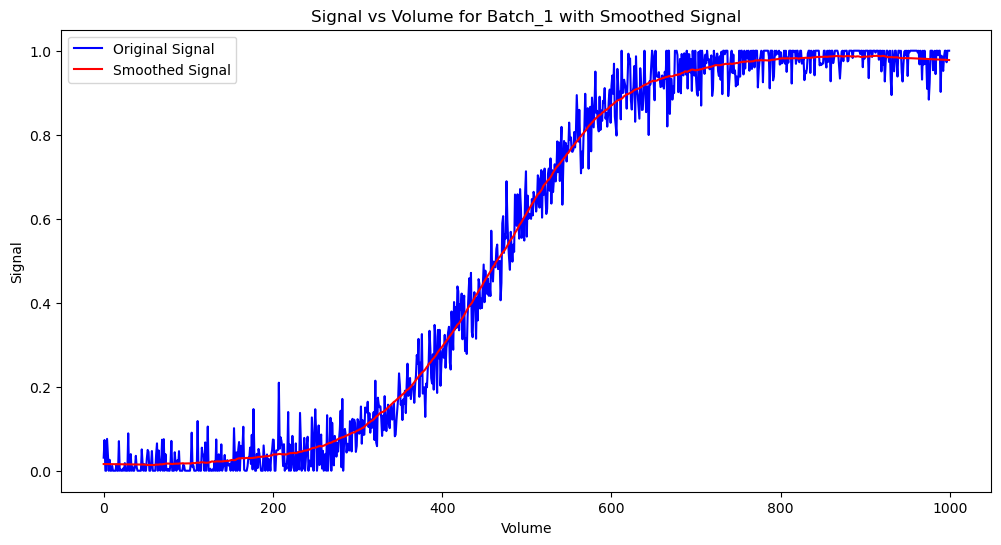

In [6]:
df_smooth  = smooth_signal(df_final, example_batch="Batch_1", window_length=100, polyorder=1)

In [7]:
df_smooth

,Batch,Volume,Signal,Campaign,Smoothed_Signal
0,Batch_1,0,0.031108,C1,0.015900
1,Batch_1,1,0.073149,C1,0.015874
2,Batch_1,2,0.000000,C1,0.015849
3,Batch_1,3,0.000000,C1,0.015823
4,Batch_1,4,0.075847,C1,0.015797
...,...,...,...,...,...
19995,Batch_20,995,0.972519,C1,0.990427
19996,Batch_20,996,0.997452,C1,0.990416
19997,Batch_20,997,0.986163,C1,0.990405
19998,Batch_20,998,0.987074,C1,0.990394


## 2.2 Normalizing

In [8]:
from helper_functions import normalize_signal

/Users/vinniegaul/Documents/direct_transitional_analysis/helper_functions.py:137: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


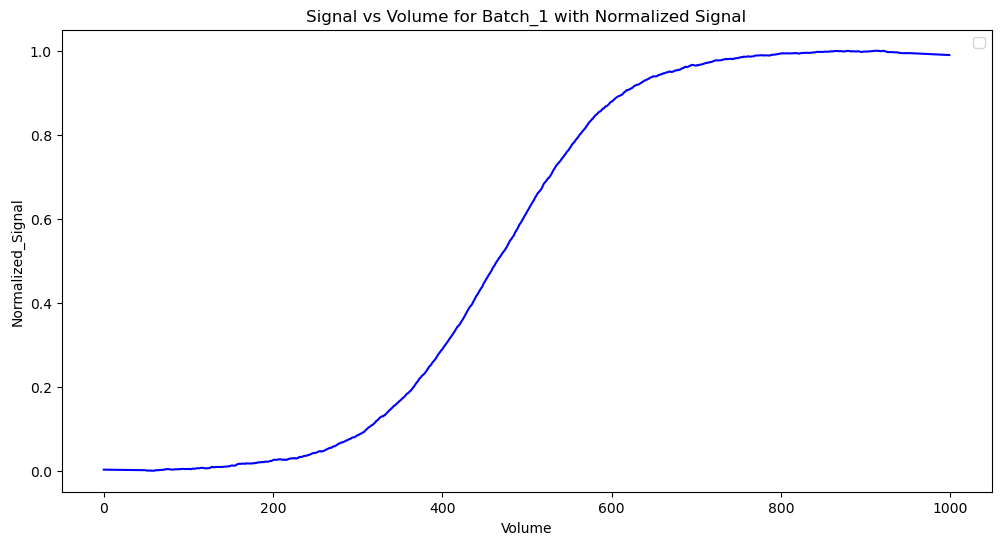

In [9]:
df_normalized  = normalize_signal(df_smooth, example_batch="Batch_1")

In [10]:
df_normalized

,Batch,Volume,Signal,Campaign,Smoothed_Signal,Normalized_Signal
0,Batch_1,0,0.031108,C1,0.015900,0.002550
1,Batch_1,1,0.073149,C1,0.015874,0.002524
2,Batch_1,2,0.000000,C1,0.015849,0.002497
3,Batch_1,3,0.000000,C1,0.015823,0.002471
4,Batch_1,4,0.075847,C1,0.015797,0.002444
...,...,...,...,...,...,...
19995,Batch_20,995,0.972519,C1,0.990427,0.998470
19996,Batch_20,996,0.997452,C1,0.990416,0.998460
19997,Batch_20,997,0.986163,C1,0.990405,0.998449
19998,Batch_20,998,0.987074,C1,0.990394,0.998438


## 2.3 Derivative

In [11]:
from helper_functions import calculate_smooth_first_derivative

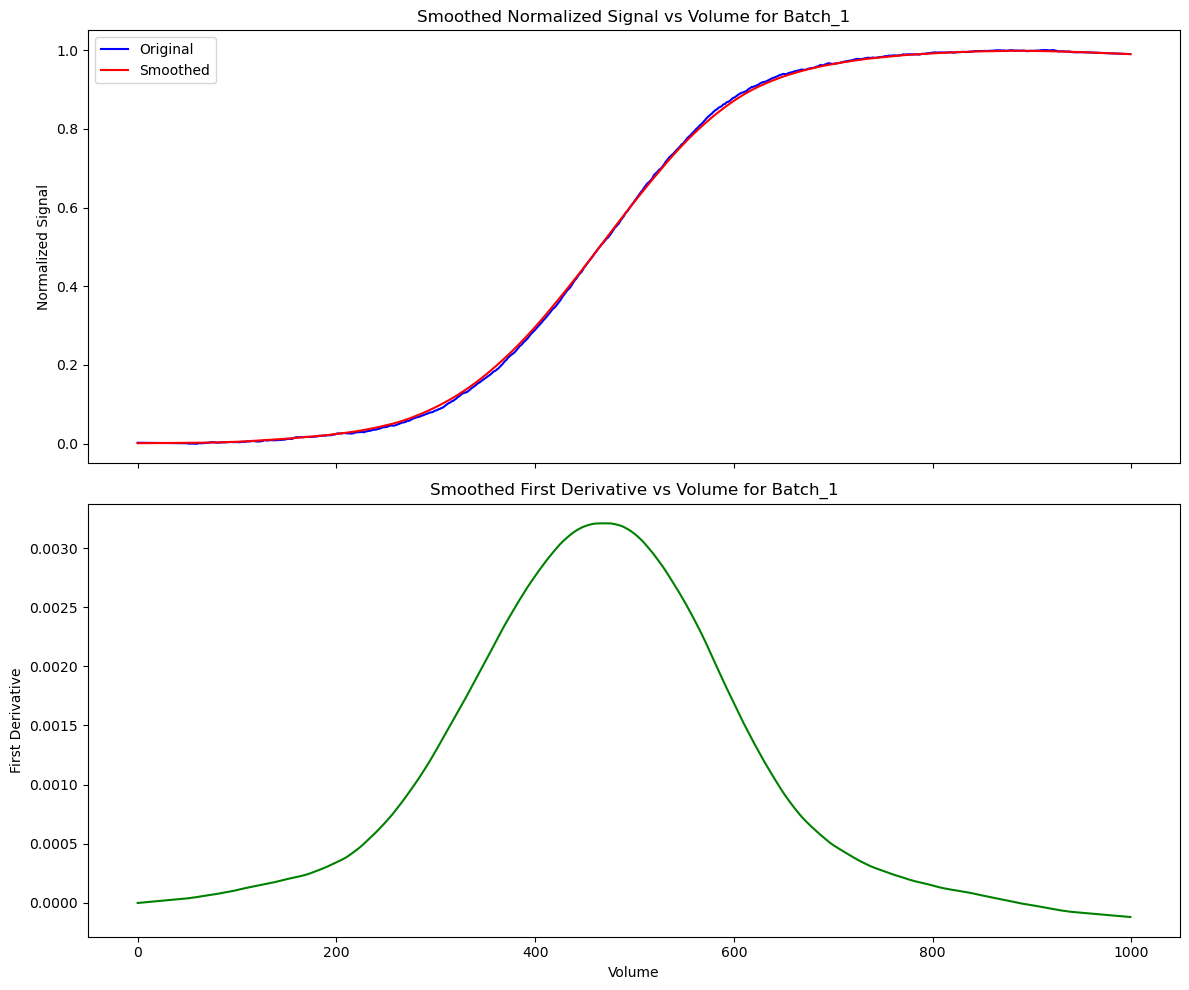

,Batch,Volume,Signal,Campaign,Smoothed_Signal,Normalized_Signal,First_Derivative
0,Batch_1,0,0.031108,C1,0.001343,0.002550,-1.964168e-06
1,Batch_1,1,0.073149,C1,0.001360,0.002524,-1.198173e-06
2,Batch_1,2,0.000000,C1,0.001378,0.002497,-4.321780e-07
3,Batch_1,3,0.000000,C1,0.001395,0.002471,3.338172e-07
4,Batch_1,4,0.075847,C1,0.001412,0.002444,1.099812e-06
...,...,...,...,...,...,...,...
19995,Batch_20,995,0.972519,C1,0.998720,0.998470,-3.475103e-05
19996,Batch_20,996,0.997452,C1,0.998715,0.998460,-3.624923e-05
19997,Batch_20,997,0.986163,C1,0.998710,0.998449,-3.774743e-05
19998,Batch_20,998,0.987074,C1,0.998706,0.998438,-3.924563e-05


In [12]:
calculate_smooth_first_derivative(df_normalized, example_batch="Batch_1", window_length=100, polyorder=1)


In [13]:
# from helper_functions import normalize_signal



In [15]:
from trans_width import calculate_transwidth

In [16]:
# direct_af.py
from direct_af import calculate_direct_af

In [17]:
def analyze_chromatography(df):
    results = []
    
    for batch in df['Batch'].unique():
        batch_data = df[df['Batch'] == batch]
        volume = batch_data['Volume'].values
        signal = batch_data['Normalized_Signal'].values
        deriv = batch_data['First_Derivative'].values
        
        
    
        
        # Find the maximum of the derivative (steepest point of the S-curve)
        max_dydx_index = np.argmax(deriv)
        max_dydx = deriv[max_dydx_index]
        
        # Calculate metrics based on the derivative
        transwidth = calculate_transwidth(volume, signal)
        direct_af = calculate_direct_af(volume, signal)
        
        results.append({
            'Batch': batch,
            'Max_Slope': max_dydx,
            'Transwidth': transwidth,
            'Direct_Af': direct_af
        })
    
    return pd.DataFrame(results)

In [18]:
def establish_control_limits(metrics, n=15):
    control_limits = {}
    for column in metrics.columns:
        if column != 'Batch':
            data = metrics[column].iloc[:n]
            mean = data.mean()
            std = data.std()
            ucl = mean + 3 * std
            lcl = mean - 3 * std
            control_limits[column] = {'mean': mean, 'ucl': ucl, 'lcl': lcl}
    return control_limits

In [19]:
def create_control_charts(results, control_limits, original_df):
    # Merge the results with the original dataframe to get the Campaign information
    merged_results = pd.merge(results, original_df[['Batch', 'Campaign']].drop_duplicates(), on='Batch', how='left')
    
    metrics = ['Max_Slope', 'Transwidth', 'Direct_Af']
    
    # Create a color map based on unique campaigns
    unique_campaigns = merged_results['Campaign'].unique()
    n_colors = len(unique_campaigns)
    color_map = plt.cm.get_cmap('Dark2')  # You can change 'tab10' to other colormaps if needed
    colors = ListedColormap(color_map(np.linspace(0, 1, n_colors)))
    campaign_color_dict = dict(zip(unique_campaigns, colors.colors))
    
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 6*len(metrics)), sharex=True)
    fig.suptitle('Control Charts for Chromatography Metrics', fontsize=16)
    
    for ax, metric in zip(axes, metrics):
        data = merged_results[metric]
        batches = merged_results['Batch']
        campaigns = merged_results['Campaign']
        
        # Plot the metric values, colored by campaign
        for campaign in unique_campaigns:
            mask = campaigns == campaign
            ax.scatter(batches[mask], data[mask], c=[campaign_color_dict[campaign]], 
                       label=campaign)
        
        # Connect points with lines
        ax.plot(batches, data, color='black', alpha=0.3, zorder=1)
        
        # Plot control limits
        ax.axhline(y=control_limits[metric]['mean'], color='green', linestyle='--', label='Mean')
        ax.axhline(y=control_limits[metric]['ucl'], color='red', linestyle='--', label='UCL')
        ax.axhline(y=control_limits[metric]['lcl'], color='red', linestyle='--', label='LCL')
        
        # Highlight out-of-control points
        out_of_control = (data > control_limits[metric]['ucl']) | (data < control_limits[metric]['lcl'])
        ax.scatter(batches[out_of_control], data[out_of_control], 
                   facecolors='none', edgecolors='red', s=100, zorder=5, label='Out of Control')
        
        ax.set_title(f'Control Chart for {metric}')
        ax.set_ylabel(metric)
        
        # Create legend
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Handle x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    ax.set_xlabel('Batch')
    plt.tight_layout()
    plt.show()

In [20]:
results = analyze_chromatography(df_final, 20)
control_limits = establish_control_limits(results)
create_control_charts(results, control_limits, df_final)

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

# Plots
note the filtering/params supplied may be different than above

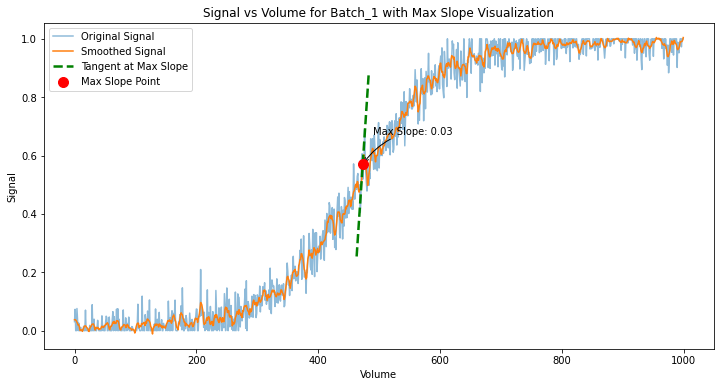

In [14]:
def plot_max_slope(df, batch):
    # Filter the data for the specified batch
    batch_data = df[df['Batch'] == batch]
    
    # Sort the data by Volume
    batch_data = batch_data.sort_values('Volume')
    
    # Extract volume and signal data
    volume = batch_data['Volume'].values
    signal = batch_data['Signal'].values
    
    # Smooth the signal
    signal_smooth = savgol_filter(signal, window_length=11, polyorder=3)
    
    # Calculate the derivative
    dydx = np.gradient(signal_smooth, volume)
    
    # Find the index of maximum slope
    max_slope_index = np.argmax(dydx)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot the original data
    sns.lineplot(x=volume, y=signal, label='Original Signal', alpha=0.5)
    
    # Plot the smoothed data
    sns.lineplot(x=volume, y=signal_smooth, label='Smoothed Signal')
    
    # Highlight the point of maximum slope
    plt.scatter(volume[max_slope_index], signal_smooth[max_slope_index], 
                color='red', s=100, zorder=5, label='Max Slope Point')
    
    # Add a more prominent tangent line at the point of maximum slope
    tangent_x = np.array([volume[max_slope_index] - 10, volume[max_slope_index] + 10])
    tangent_y = dydx[max_slope_index] * (tangent_x - volume[max_slope_index]) + signal_smooth[max_slope_index]
    
    
    
    # Plot the main tangent line
    plt.plot(tangent_x, tangent_y, color='green', linestyle='--', linewidth=2.5, label='Tangent at Max Slope')
    
    plt.title(f'Signal vs Volume for {batch} with Max Slope Visualization')
    plt.xlabel('Volume')
    plt.ylabel('Signal')
    plt.legend()
    
    # Add text annotation for max slope value
    plt.annotate(f'Max Slope: {dydx[max_slope_index]:.2f}', 
                 xy=(volume[max_slope_index], signal_smooth[max_slope_index]),
                 xytext=(10, 30), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    
    plt.show()

# Example usage:
plot_max_slope(df_final, 'Batch_1')  # Plot for Batch 1

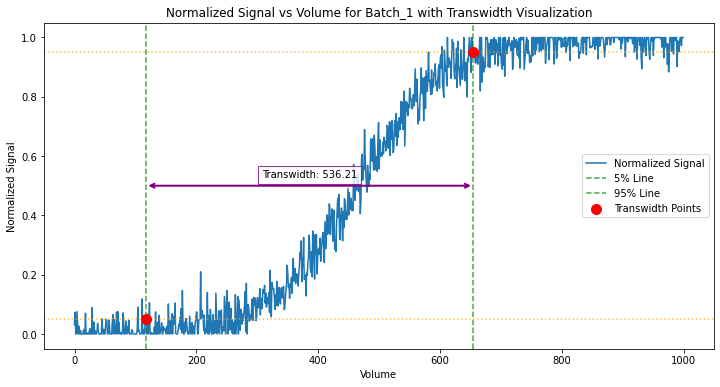

Calculated Transwidth: 536.21


In [16]:
from trans_width import calculate_and_plot_transwidth

# Example usage:
transwidth = calculate_and_plot_transwidth(df_final, "Batch_1")  # Plot for Batch 1
print(f"Calculated Transwidth: {transwidth:.2f}")

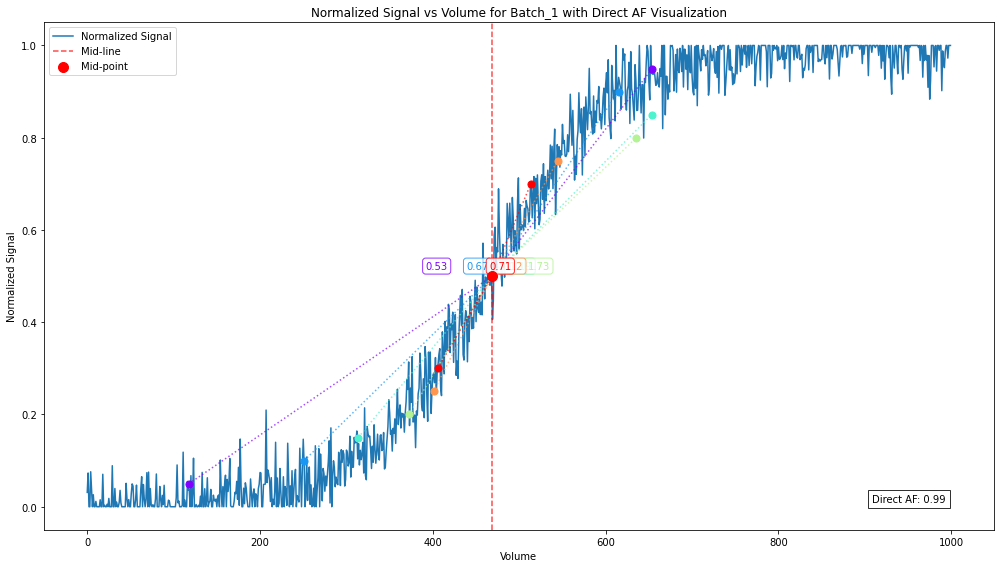

Calculated Direct AF: 0.99


In [17]:
# direct_af.py
from direct_af import calculate_and_plot_direct_af

# Example usage:
direct_af = calculate_and_plot_direct_af(df_final, "Batch_1")  # Plot for Batch 1
print(f"Calculated Direct AF: {direct_af:.2f}")

In [541]:
def calculate_direct_af(volume, signal):
    # Sort the data by Volume
   

    # Normalize the signal
    normalized_signal = normalize_signal(signal)

    # Create interpolation function
    interp_func = interp1d(normalized_signal, volume, kind='linear', bounds_error=False, fill_value="extrapolate")

    cv_mid = interp_func(0.5)
    
    return cv_mid

In [542]:
calculate_direct_af(temp['Volume'], temp['Signal'])

array(375.24034166)

In [543]:
def calculate_direct_af(volume, signal):
    # Sort the data by Volume
    

    # Normalize the signal
    normalized_signal = normalize_signal(signal)

    cv_mid = np.interp(0.5, normalized_signal, volume) 
    
    return cv_mid

In [544]:
calculate_direct_af(temp['Volume'], temp['Signal'])

361.686121130286

In [545]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt



def visualize_interpolation(volume, signal):
    

    # Normalize the signal
    normalized_signal = normalize_signal(signal)

    # Create interpolation functions
    interp_func_scipy = interp1d(normalized_signal, volume, kind='linear', bounds_error=False, fill_value="extrapolate")
    
    # Generate points for smooth curve
    x_smooth = np.linspace(0, 1, 1000)
    y_smooth_scipy = interp_func_scipy(x_smooth)
    y_smooth_numpy = np.interp(x_smooth, normalized_signal, volume)

    # Calculate midpoints
    cv_mid_scipy = interp_func_scipy(0.5)
    cv_mid_numpy = np.interp(0.5, normalized_signal, volume)

    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.scatter(normalized_signal, volume, color='black', label='Original Data')
    plt.plot(x_smooth, y_smooth_scipy, color='blue', label='SciPy Interpolation')
    plt.plot(x_smooth, y_smooth_numpy, color='red', linestyle='--', label='NumPy Interpolation')
    plt.scatter([0.5], [cv_mid_scipy], color='blue', s=100, marker='o', label='SciPy Midpoint')
    plt.scatter([0.5], [cv_mid_numpy], color='red', s=100, marker='s', label='NumPy Midpoint')

    plt.xlabel('Normalized Signal')
    plt.ylabel('Volume')
    plt.title('Interpolation Visualization')
    plt.legend()
    plt.grid(True)

    # Add text annotations for midpoint values
    plt.annotate(f'SciPy: {cv_mid_scipy:.2f}', (0.5, cv_mid_scipy), xytext=(10, 10), 
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
    plt.annotate(f'NumPy: {cv_mid_numpy:.2f}', (0.5, cv_mid_numpy), xytext=(10, -10), 
                 textcoords='offset points', ha='left', va='top',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.show()



/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/opt/anaconda3/envs/datascience/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


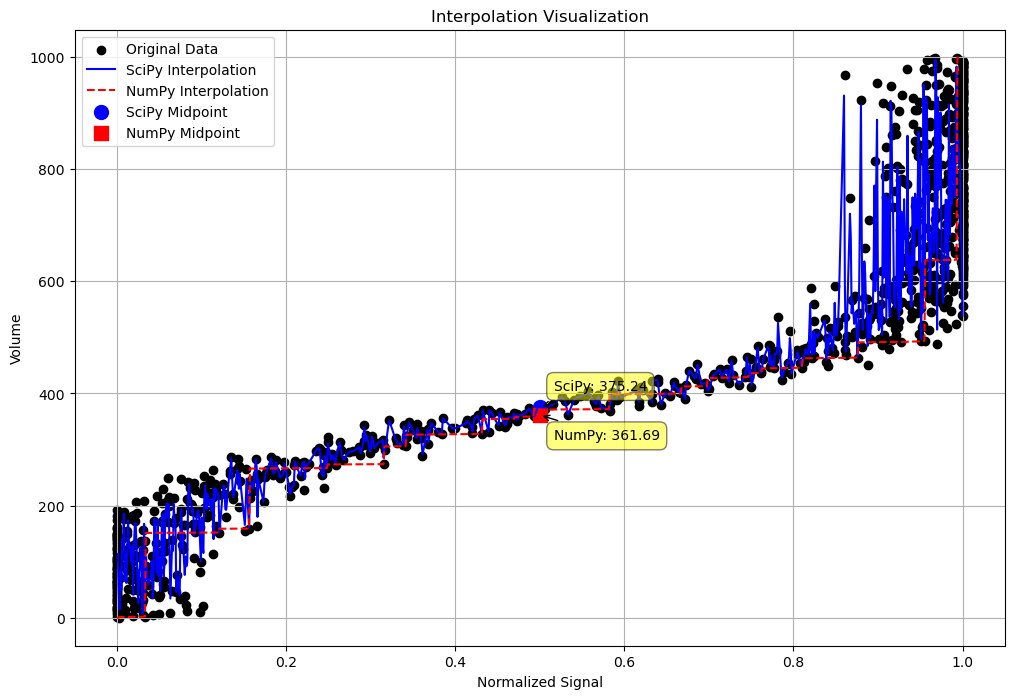

In [546]:
visualize_interpolation(temp['Volume'], temp['Signal'])